In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.losses import mean_squared_error
from sklearn.linear_model import LinearRegression
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 108



In [24]:
dt = pd.read_csv("model_data/data.csv",sep ="\t")

# standard
scaler = StandardScaler()
scaler.fit(dt.drop('Real',axis =1))

ds = scaler.transform(dt.drop('Real',axis=1))
print(ds)
y = dt.Real
print(y.tail())

[[-0.08926491 -0.23460424 -0.26868387 -0.14485252 -0.10806023]
 [-0.17678939 -0.46434103 -0.25942033 -0.13760738 -0.10806023]
 [-0.17934752 -0.4761224  -0.29647447 -0.14485252 -0.10806023]
 ...
 [-0.11557707 -0.32885523 -0.28412309 -0.13760738 -0.10806023]
 [-0.14499553 -0.41132484  5.98420158 -0.14485252  0.23843922]
 [-0.18117475  0.03636736 -0.25633249 -0.14485252 -0.10806023]]
3950    1
3951    1
3952   -1
3953    1
3954    1
Name: Real, dtype: int64


In [65]:
poly =PolynomialFeatures(2)
ds=poly.fit_transform(ds)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ds, y, test_size=0.2, random_state=1)
print("Training set has {} instances. Test set has {} instances.".format(X_train.shape[0], X_test.shape[0]))



Training set has 3164 instances. Test set has 791 instances.


In [69]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 3, 5, 7, 10, 20, 100])
ridgecv.fit(X_train, y_train)
ridgecv.alpha_ 

100000.0

In [68]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Ridge(alpha=100000.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
print (ridge.coef_)
print (ridge.intercept_)


[ 0.00000000e+00  1.41346564e-04  2.04828947e-04  4.82581922e-03
 -1.18796681e-04  1.66811777e-03  7.32649451e-05 -1.61814139e-04
 -3.61755194e-04 -9.85620018e-06 -2.31236025e-04 -2.09442524e-06
 -2.07788133e-04 -1.54842011e-05  2.64444443e-05  3.37551184e-03
 -6.64707229e-04  2.52930318e-04  3.33846309e-05 -2.28822574e-04
  1.48754190e-03  9.74872689e-05 -5.59261012e-04  4.58212353e-04
 -2.43766487e-05  2.49009014e-05 -6.58178072e-04  4.66233819e-04
  1.10997836e-05  1.89900741e-05 -2.70906602e-04  4.93441392e-05
 -6.60877210e-05 -3.45211899e-09  3.23520983e-05 -1.77487201e-04
  2.85062547e-04  1.80978395e-03 -5.20419114e-05  4.55495785e-04
 -3.18447178e-04  2.59884526e-05  7.89467023e-05  3.53508126e-07
 -5.36074800e-06  1.82710452e-04  5.82895420e-03 -4.99001209e-04
  6.10141919e-04  9.16111515e-05 -4.03486295e-05  7.19830833e-04
 -7.06164385e-06  3.14014857e-05 -2.16860339e-04  2.32978243e-03
  4.33979132e-04 -1.47076522e-03  5.25833414e-04 -5.06590166e-05
 -1.57674438e-05 -1.58166

In [ ]:
ridge.predict(X_test)

In [ ]:
ridge.score(X_test, y_test)

In [ ]:
start =200
end =300
y_pre =ridge.predict(X_test) #是调用predict函数的拟合值
time =np.arange(start,end)
plt.plot(time,y[start:end],'b',label="real")
plt.plot(time,y_pre[start:end],'r',label='predict')
plt.legend(loc='upper left')
plt.show()

In [55]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree=degree)
Phi_train = poly.fit_transform(X_train)
Phi_test = poly.fit_transform(X_test)
print("Original design matrix (first 5 rows):\n", X_train[0:5], "\n")
print("Transformed design matrix (first 5 rows):\n", Phi_train[0:5])
lr_poly = LinearRegression(fit_intercept=False).fit(Phi_train, y_train)

array([-7.54480903e-02, -1.63399108e-02, -6.39981619e-02, -7.59782209e-02,
       -5.49505853e-02, -7.24522053e-02, -9.10593763e-02,  8.22515623e-02,
       -5.38328769e-02,  2.06890717e-01, -7.12007137e-02, -7.62109628e-02,
        1.20070473e-01, -6.07198939e-02, -5.80830849e-02, -6.79083258e-02,
       -6.56898128e-02, -1.57611226e-02,  1.20867511e-01, -8.56317147e-02,
       -8.79124064e-03,  8.87979246e-02,  3.81170414e-01, -7.00268852e-02,
       -7.81696641e-02, -7.20550535e-02, -4.91137240e-02, -1.06520058e-01,
       -7.31231232e-02, -7.27653185e-02,  1.21303603e-01, -7.32730656e-02,
       -3.15722741e-02, -7.23566823e-02, -4.87152981e-03, -7.15878808e-02,
       -2.22758145e-02, -7.58977273e-02, -6.96336228e-02,  1.31433093e-03,
       -3.38796074e-02, -8.18598277e-02, -6.20134857e-02, -7.24498796e-02,
        2.34688612e-01, -7.12350238e-02,  6.42440347e-01, -1.07233294e-02,
       -1.02196947e+00, -7.33987445e-02, -6.40472685e-02, -8.01524704e-02,
       -6.17141398e-02, -

In [56]:
ridge.score(X_test, y_test)

0.10285195485976684

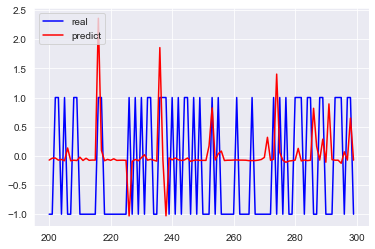

In [59]:
start =200
end =300
y_pre =ridge.predict(X_test) #是调用predict函数的拟合值
time =np.arange(start,end)
plt.plot(time,y[start:end],'b',label="real")
plt.plot(time,y_pre[start:end],'r',label='predict')
plt.legend(loc='upper left')
plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree=degree)
Phi_train = poly.fit_transform(X_train)
Phi_test = poly.fit_transform(X_test)
print("Original design matrix (first 5 rows):\n", X_train[0:5], "\n")
print("Transformed design matrix (first 5 rows):\n", Phi_train[0:5])
lr_poly = LinearRegression(fit_intercept=False).fit(Phi_train, y_train)

Original design matrix (first 5 rows):
 [[-0.17532761 -0.45255965 -0.29338662 -0.13760738 -0.10806023]
 [ 0.06020279 -0.11089981  2.05955101 -0.14485252  0.03631454]
 [-0.1815402  -0.42310622 -0.29647447 -0.13398481 -0.10806023]
 [-0.17039408 -0.47023171 -0.29647447 -0.13398481 -0.10806023]
 [-0.16893229 -0.39954347 -0.28721093 -0.13760738 -0.10806023]] 

Transformed design matrix (first 5 rows):
 [[ 1.00000000e+00 -1.75327606e-01 -4.52559651e-01 -2.93386622e-01
  -1.37607380e-01 -1.08060225e-01  3.07397695e-02  7.93462004e-02
   5.14387742e-02  2.41263725e-02  1.89459407e-02  2.04810238e-01
   1.32774948e-01  6.22755477e-02  4.89036980e-02  8.60757102e-02
   4.03721643e-02  3.17034246e-02  1.89357909e-02  1.48698845e-02
   1.16770123e-02]
 [ 1.00000000e+00  6.02027935e-02 -1.10899813e-01  2.05955101e+00
  -1.44852525e-01  3.63145437e-02  3.62437634e-03 -6.67647857e-03
   1.23990724e-01 -8.72052663e-03  2.18623698e-03  1.22987686e-02
  -2.28403823e-01  1.60641180e-02 -4.02727612e-03  4

In [34]:
# X_grid = np.linspace(X_train.min(), X_train.max(), num=1001)
# Phi_grid = poly.fit_transform(X_grid[:,np.newaxis])
# y = lr_poly.predict(Phi_grid)
# plt.plot(X_grid, y, 'k-', label='Prediction')
# plt.scatter(X_train, y_train, color='b', marker='.', label='Train')
# #plt.scatter(X_test_s, y_test, color='r', marker='.', label='Test')
# plt.legend()
# plt.ylabel("$y$ (Median House Value)")
# plt.xlabel("$x$ (LSTAT)")
# plt.show()

In [10]:
from sklearn.linear_model import Ridge
X_train = X_train/ 100.0
X_test = X_test / 100.0

In [11]:
degrees = list(range(12))
models = list()
train_mses = list()
test_mses = list()

X_grid = np.linspace(min(X_train.min(), X_test.min()),
                     max(X_train.max(), X_test.max()), num=1001)

plt.figure(figsize=(20,16))
for i, degree in enumerate(degrees):
    plt.subplot(len(degrees)//2, 2, i+1)

    # Transform features
    poly = PolynomialFeatures(degree=degree)
    Phi_train, Phi_test = poly.fit_transform(X_train), poly.fit_transform(X_test)
    Phi_grid = poly.fit_transform(X_grid[:,np.newaxis])

    # Fit model
    lr_poly = Ridge(alpha = 0.002).fit(Phi_train, y_train)
    models.append(lr_poly)
    
    # Evaluate
    train_mse = mean_squared_error(lr_poly.predict(Phi_train), y_train)
    train_mses.append(train_mse)
    test_mse = mean_squared_error(lr_poly.predict(Phi_test), y_test)
    test_mses.append(test_mse)

    plt.plot(X_grid, lr_poly.predict(Phi_grid), 'k', label='Prediction')
    plt.scatter(X_train, y_train, color='b', marker='.', label='Train')
    #plt.scatter(X_test_s, y_test, color='r', marker='.', label='Test')
    plt.title('Degree {} | Train MSE {:.3f}'.format(degree, train_mse))
    plt.legend()

plt.suptitle('Polynomial ridge regression for different polynomial degrees', y=1.05, fontsize=32)
plt.tight_layout()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().